# Automatic anomaly detection using the Brildata model 

Lets begin by importing our packages and loading our data.

In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import sys
sys.path.append("..")
import warnings
import json
warnings.filterwarnings("ignore")

In [23]:
from src.model.searcher import AnomalySearcher
from src.data.mounting_tool import MountData

### Importing and cleaning the data

In setmount we have a little script to create the mount to the dessired data.
Modify the bash script to make it work for your computing account and cmsusr


In [24]:
MOUNT_TARGET = "/afs/cern.ch/user/j/jmunozar/private/InProcess/plt/mounts/h5s/"

In [25]:
with open('../secrets.json', "r") as f:
    config = json.load(f)
mounter = MountData(user="jmunozar", password=config["pass"])
mounter.create_mount(mount_source="brildev1:/brildata/22/", 
                     mount_target=MOUNT_TARGET)

fuse: mountpoint is not empty
fuse: if you are sure this is safe, use the 'nonempty' mount option


# Usage

To create a anomaly detector, simply provide the `AnomalySearcher` class the path to where the brildata is mounted

In [26]:
anm_searcher = AnomalySearcher(MOUNT_TARGET)

Data mount found


And now, lets select a Fill to analyze, this is direct:

In [44]:
FILL_N = 8479
anomaly_dict = anm_searcher(FILL_N,
                            return_preprocessed=True,
                            return_original=True,
                            generate_plots=True,
                            save_path = f"/afs/cern.ch/user/j/jmunozar/private/InProcess/plt/results")

In [ ]:
anomaly_dict["original"]

channelid,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
dt,,,,,,,,,,,,,,,,
2022-11-16 12:03:04,0.000055,0.000052,0.000034,0.000029,0.000023,7.224123e-05,0.000106,0.000031,0.000000e+00,7.877954e-07,0.000042,4.233676e-05,5.011253e-05,0.000134,8.635467e-05,0.000027
2022-11-16 12:03:05,0.000055,0.000052,0.000034,0.000029,0.000023,7.247047e-05,0.000106,0.000031,0.000000e+00,7.614477e-07,0.000043,4.244348e-05,5.010067e-05,0.000134,8.653782e-05,0.000027
2022-11-16 12:03:06,0.000055,0.000052,0.000034,0.000029,0.000023,7.269971e-05,0.000106,0.000031,0.000000e+00,7.351001e-07,0.000043,4.255019e-05,5.008881e-05,0.000134,8.672096e-05,0.000027
2022-11-16 12:03:07,0.000055,0.000052,0.000034,0.000029,0.000023,7.292895e-05,0.000106,0.000031,0.000000e+00,7.087524e-07,0.000043,4.265691e-05,5.007695e-05,0.000134,8.690411e-05,0.000027
2022-11-16 12:03:08,0.000055,0.000052,0.000034,0.000029,0.000023,7.315819e-05,0.000106,0.000032,0.000000e+00,6.824047e-07,0.000043,4.276362e-05,5.006509e-05,0.000134,8.708725e-05,0.000027
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-17 00:06:58,0.034259,0.028024,0.021983,0.013795,0.018692,1.091985e-02,0.012449,0.015145,1.712599e-08,3.816597e-03,0.038120,3.713122e-02,3.333487e-02,0.031357,2.789597e-02,0.028316
2022-11-17 00:06:59,0.025694,0.021018,0.016487,0.010346,0.014019,8.189888e-03,0.009337,0.011359,1.284449e-08,2.862448e-03,0.028590,2.784841e-02,2.500115e-02,0.023518,2.092198e-02,0.021237
2022-11-17 00:07:00,0.017130,0.014012,0.010991,0.006897,0.009346,5.459929e-03,0.006225,0.007573,8.562994e-09,1.908299e-03,0.019060,1.856561e-02,1.666744e-02,0.015679,1.394799e-02,0.014158


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
def plot_fill(df, fill_number, output_path=None):
    _df = df.copy().reset_index()[::4]
    fig, ax = plt.subplots(figsize=(20, 7))
    for col in _df.columns:
        if not str(col).isnumeric():
            continue
        sns.lineplot(x=_df["dt"], y=_df[col], label=col, ax=ax)
    ax.set_title(f"Fill {fill_number}")
    if output_path:
        out_path = os.path.join(output_path, f"{fill_number}")
        if not os.path.exists(out_path):
            os.makedirs(out_path)
        else:
            pass
        plt.savefig(out_path + "/rate.png")
    else:
        plt.show()
        plt.close()

In [ ]:
anomaly_dict["preprocessed"]

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15
index,,,,,,,,,,,,,,,,
2022-11-16 12:03:04.000000000,0.000096,0.000135,0.000233,0.000225,0.000201,0.000830,0.001213,0.000004,0.000418,0.000407,0.000208,0.000202,0.000115,0.000475,0.000255,0.000234
2022-11-16 12:03:05.025569590,0.000096,0.000135,0.000233,0.000225,0.000201,0.000830,0.001213,0.000004,0.000418,0.000407,0.000208,0.000202,0.000115,0.000475,0.000255,0.000234
2022-11-16 12:03:06.051139180,0.000096,0.000135,0.000233,0.000225,0.000201,0.000830,0.001213,0.000004,0.000418,0.000407,0.000208,0.000202,0.000115,0.000475,0.000255,0.000234
2022-11-16 12:03:07.076708770,0.000096,0.000135,0.000233,0.000225,0.000201,0.000830,0.001213,0.000004,0.000418,0.000407,0.000208,0.000202,0.000115,0.000475,0.000255,0.000234
2022-11-16 12:03:08.102278360,0.000096,0.000135,0.000233,0.000225,0.000201,0.000830,0.001213,0.000004,0.000418,0.000407,0.000208,0.000202,0.000115,0.000475,0.000255,0.000234
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-11-17 00:06:56.872136500,0.049347,0.083525,0.147893,0.228745,0.018011,0.019411,0.015196,0.036811,0.317507,0.100943,0.053023,0.054953,0.058260,0.029033,0.063435,0.064399
2022-11-17 00:06:57.897706090,0.049310,0.083460,0.147779,0.228575,0.017990,0.019406,0.015194,0.036781,0.317288,0.100864,0.052985,0.054913,0.058217,0.029012,0.063388,0.064351
2022-11-17 00:06:58.923275680,0.049268,0.083389,0.147654,0.228387,0.017967,0.019401,0.015192,0.036747,0.317036,0.100775,0.052942,0.054869,0.058170,0.028990,0.063336,0.064299


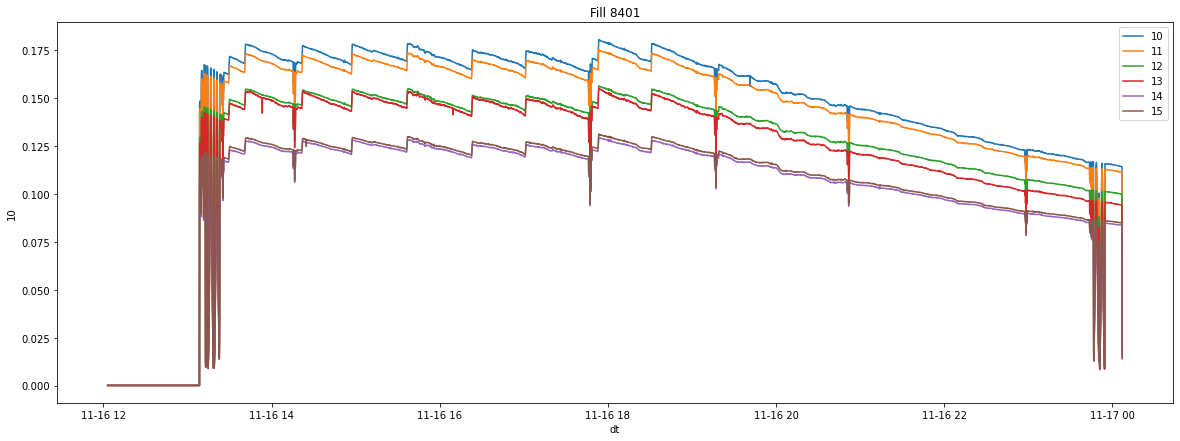

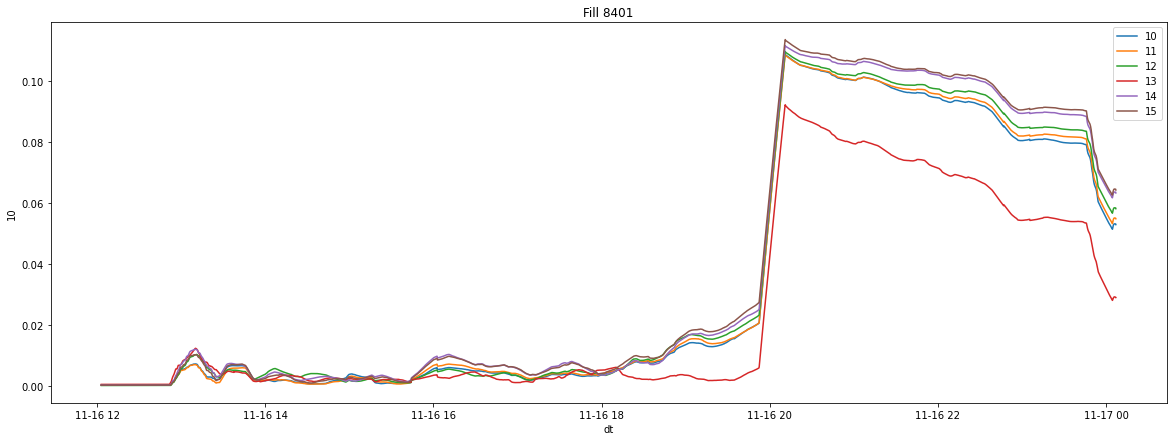

In [38]:
plot_fill(anomaly_dict["original"][[10, 11, 12, 13, 14, 15]], FILL_N)
plot_fill(anomaly_dict["preprocessed"].reset_index().rename(columns={"index":"dt"})[["dt", 10, 11, 12, 13, 14, 15]], FILL_N)

That is it, the report was generated and stored in `save_path`.

### Running for all files

In [13]:
if False:
    AnomalySearcher().run_scan(
        mount_path="/afs/cern.ch/user/j/jmunozar/private/ProjectsSummer2022/Files/mnt22",
        output_path="/afs/cern.ch/user/j/jmunozar/private/ProjectsSummer2022/MeetingResults",
        make_anomalous_plots=True,
        overwrite=False,
        progress_bar=True,
    )

In [14]:
import glob

In [40]:
all_stable_fills = [7532, 7533, 7652, 7662, 7663, 7670, 7692, 7694, 7696, 7697, 7702, 7703, 7733, 7822, 7876, 7895, 7916, 7920, 7921, 7923, 7960, 7963, 7965, 7966, 7967, 7969, 7978, 8007, 8016, 8017, 8018, 8019, 8020, 8022, 8023, 8027, 8030, 8033, 8043, 8046, 8057, 8058, 8059, 8062, 8063, 8067, 8068, 8072, 8073, 8076, 8078, 8079, 8081, 8083, 8087, 8088, 8091, 8094, 8098, 8099, 8100, 8102, 8103, 8106, 8108, 8111, 8112, 8113, 8115, 8118, 8120, 8121, 8124, 8125, 8128, 8132, 8136, 8142, 8143, 8144, 8146, 8147, 8148, 8149, 8151, 8177, 8178, 8181, 8184, 8210, 8211, 8212, 8214, 8216, 8220, 8221, 8222, 8223, 8225, 8226, 8228, 8230, 8232, 8233, 8236, 8238, 8245, 8247, 8248, 8253, 8260, 8263, 8267, 8269, 8272, 8273, 8274, 8276, 8289, 8293, 8295, 8297, 8299, 8301, 8302, 8304, 8305, 8306, 8307, 8309, 8311, 8312, 8313, 8314, 8315, 8316, 8317, 8319, 8320, 8321, 8322, 8324, 8327, 8330, 8331, 8333, 8334, 8335, 8342, 8345, 8347, 8379, 8381, 8383, 8385, 8387, 8389, 8392, 8395, 8398, 8399, 8401, 8402, 8412, 8413, 8456, 8471, 8474, 8479, 8484, 8489, 8491, 8496]
#all_stable_fills = [x for x in all_stable_fills if ".php" not in x]

In [39]:
glob.glob("/eos/project/c/cmsweb/www/plt/filteredstablefills/*")

IndexError: list index out of range

In [41]:
for fill in all_stable_fills:
    print(fill)
    try:
        os.makedirs(f"/eos/project/c/cmsweb/www/plt/filteredstablefills/{fill}")
        os.system(f"cp -r /afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/{fill}* /eos/project/c/cmsweb/www/plt/filteredstablefills/{fill}/")
        os.system(f"cp -r /afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/{fill}/* /eos/project/c/cmsweb/www/plt/filteredstablefills/{fill}/")
    except:
        print("Failed")

7532
7533


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7532*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7532/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7533*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7533/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7652*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7652/*’: No such file or directory


7652
7662
7663
7670


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7662*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7662/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7663*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7663/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7670*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7670/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7692*’: No such file or directory


7692


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7692/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7694*’: No such file or directory


7694


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7694/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7696*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7696/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7697*’: No such file or directory


7696
7697
7702
7703
7733


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7697/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7702*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7702/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7703*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7703/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7733*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7733/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmuno

7822
7876
7895
7916


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7895/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7916*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7916/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/7920*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/7920/*’: No such file or directory


7920
7921
7923
7960
7963
7965
7966
7967
7969
7978
8007
8016
8017
8018
8019
8020
8022
8023
8027
8030
8033
8043
8046
8057
8058
8059
8062
8063
8067
8068
8072
8073
8076
8078
8079
8081
8083
8087
8088
8091
8094
8098
8099
8100
8102
8103
8106
8108
8111
8112
8113
8115
8118
8120
8121
8124
8125


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8124/*’: No such file or directory


8128
8132


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8128/*’: No such file or directory


8136
8142
8143
8144
8146
8147
8148
8149
8151
8177
8178
8181
8184


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/8178*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8178/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8181/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8184/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8210/*’: No such file or directory


8210
8211


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8211/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8212/*’: No such file or directory


8212
8214
8216
8220
8221
8222
8223
8225
8226
8228
8230
8232
8233
8236
8238
8245
8247
8248
8253
8260
8263
8267


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/8263*’: No such file or directory


8269
8272
8273
8274
8276
8289
8293
8295
8297


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/anomalies/single_fill_reports/8297*’: No such file or directory


8299
8301
8302
8304
8305
8306
8307
8309
8311
8312
8313
8314
8315
8316
8317
8319
8320
8321
8322
8324
8327
8330
8331
8333
8334
8335
8342
8345
8347
8379


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8379/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8381/*’: No such file or directory


8381
8383


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8383/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8385/*’: No such file or directory


8385
8387


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8387/*’: No such file or directory


8389
8392
8395
8398


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8395/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8398/*’: No such file or directory


8399
8401


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8399/*’: No such file or directory
cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8401/*’: No such file or directory


8402


cp: cannot stat ‘/afs/cern.ch/user/j/jmunozar/private/InProcess/filtered_stable_fills/plots/8402/*’: No such file or directory


8412
8413
8456
8471
8474
8479
8484
8489
8491
8496


In [43]:
for fill_path in glob.glob("/eos/project/c/cmsweb/www/plt/filteredstablefills/*"):
    os.system("cp /eos/project/c/cmsweb/www/plt/index.php " + fill_path)
    print(fill_path)
    for idx in glob.glob(fill_path + "/*"):
        if "index.php" in idx:
            print("Done!")

/eos/project/c/cmsweb/www/plt/filteredstablefills/7532
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7533
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7652
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7662
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7663
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7670
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7692
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7694
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7696
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7697
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7702
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7703
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7733
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7822
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7876
Done!
/eos/project/c/cmsweb/www/plt/filteredstablefills/7895
Done!
/eos/project/c/cmsweb/ww

In [ ]:
os.system("cp /eos/project/c/cmsweb/www/plt/index.php ")

In [18]:
all_reports = glob.glob("/afs/cern.ch/user/j/jmunozar/private/InProcess/stable_fills/anomalies/single_fill_reports/*")

In [19]:
all_reports[0].split("/")[-1].split(".")[0]

'7652'

In [20]:
for report in all_reports:
    fill_number = report.split("/")[-1].split(".")[0]
    os.system(f"cp {report} /eos/project/c/cmsweb/www/plt/stablefills/{fill_number}" )
    print(fill_number)


7652
7662
7663
7670
7692
7694
7696
7697
7702
7703
7733
7822
7876
7895
7916
7920
7921
7923
7960
7963
7965
7966
7967
7969
7978
8007
8016
8017
8018
8019
8020
8022
8023
8027
8030
8033
8043
8046
8057
8058
8059
8062
8063
8067
8068
8072
8073
8076
8078
8079
8081
8083
8087
8088
8091
8094
8098
8099
8100
8102
8103
8106
8108
8111
8112
8113
8115
8118
8120
8121
8124
8125
8128
8132
8136
8142
8143
8144
8146
8147
8148
8149
8151
8177
8178
8181
8184
8210
8211
8212
8214
8216
8220
8221
8222
8223
8225
8226
8228
8230
8232
8233
8236
8238
8245
8247
8248
8253
8260
8263
8267
8269
8272
8273
8274
8276
8289
8293
8295
8297
8299
8301
8302
8304
8305
8306
8307
8309
8311
8312
8313
8314
8315
8316
8317
8319
8320
8321
8322
8324
8327
8330
8331
8333
8334
8335
8342
8345
8347
8379
8381
8383
8385
8387
8389
8392
8395
8398
8399
8401
8402
8412
8413
8456
8471
8474
8479
8484
8489
8491
8496
